In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [94]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [95]:
df.shape

(3999, 12)

In [96]:
df.info()    ### All are integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [97]:
df.isnull().sum()      # No null values

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [98]:
# Drop the ID column (not useful for clustering)
df.drop(columns=['ID#'],inplace=True)

In [99]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [100]:
df.describe()         #huge gaps between 75% and max which denotes outliers present in the data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x79b03a939350>,
 'caps': [<matplotlib.lines.Line2D at 0x79b03aa1a550>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b03a939590>],
 'medians': [<matplotlib.lines.Line2D at 0x79b03aa19e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b03aa1b590>],
 'means': []}

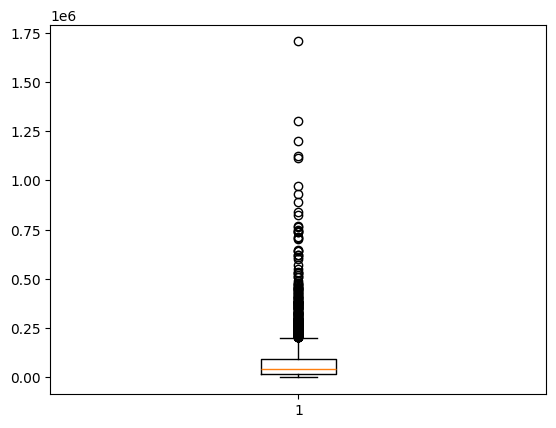

In [101]:
plt.boxplot(df.Balance)

{'whiskers': [<matplotlib.lines.Line2D at 0x79b03a921510>,
 'caps': [<matplotlib.lines.Line2D at 0x79b03a922ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b03a920c50>],
 'medians': [<matplotlib.lines.Line2D at 0x79b03ab7de90>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b03ab7f910>],
 'means': []}

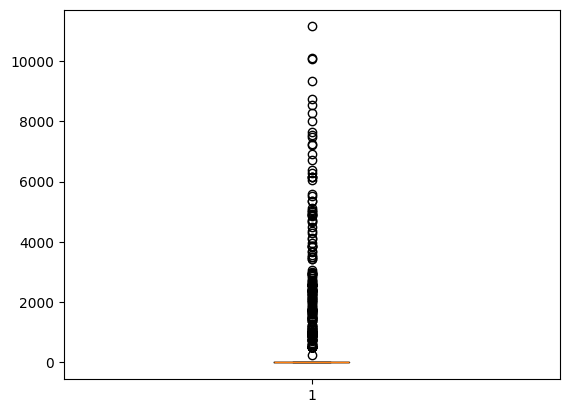

In [102]:
plt.boxplot(df.Qual_miles)

{'whiskers': [<matplotlib.lines.Line2D at 0x79b03a9b94d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79b03a9616d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b03a9bbd90>],
 'medians': [<matplotlib.lines.Line2D at 0x79b03a960890>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b03a9614d0>],
 'means': []}

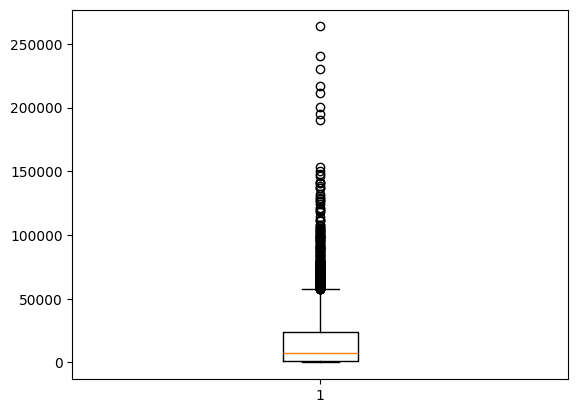

In [103]:
plt.boxplot(df.Bonus_miles)

In [104]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(df_scaled,columns=df.columns)

In [105]:
scaled_df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.842882e-17,6.574164e-17,1.705729e-16,3.038330e-16,1.350369e-16,-2.842882e-17,-7.817925e-17,0.000000,1.776801e-17,5.685763e-17,1.421441e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.099918e-01,-1.208203e+00,-0.328603,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-6.582276e-01,-8.957878e-01,-0.328603,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.130308e-01,4.145743e-02,-0.328603,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,2.756198e-01,5.621492e-01,-0.106466,-9.850333e-02,8.097050e-01,1.303918e+00
max,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,1.020957e+01,7.747696e+00,21.683004,1.361205e+01,2.023095e+00,1.303918e+00


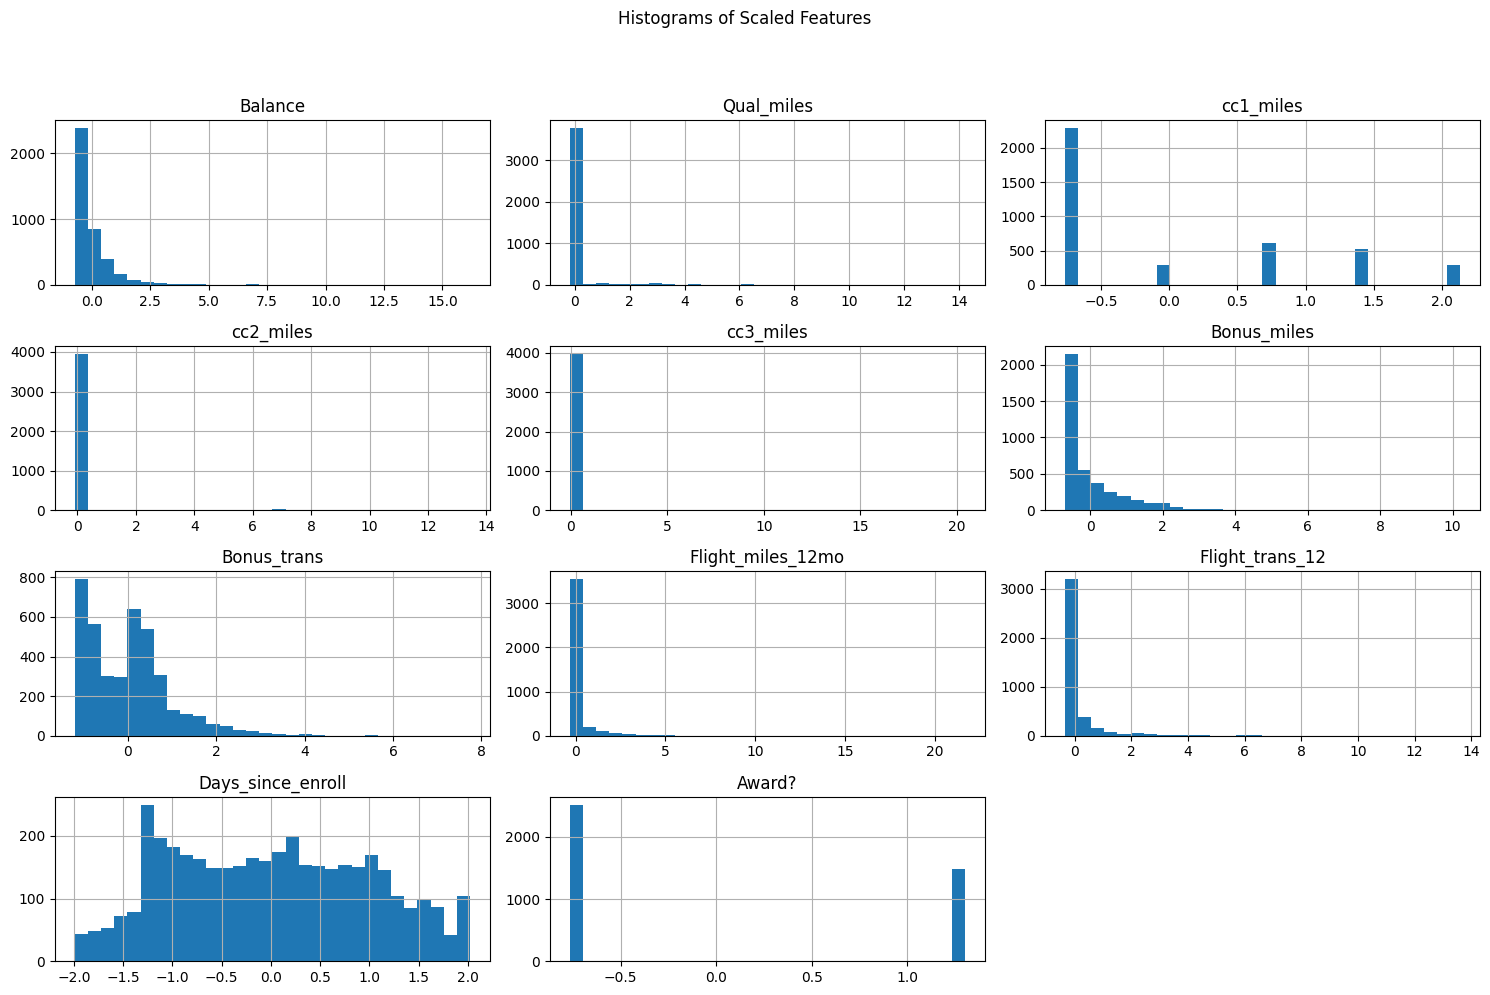

In [106]:
## EDA

scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Scaled Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()


Generating correlation heatmap...


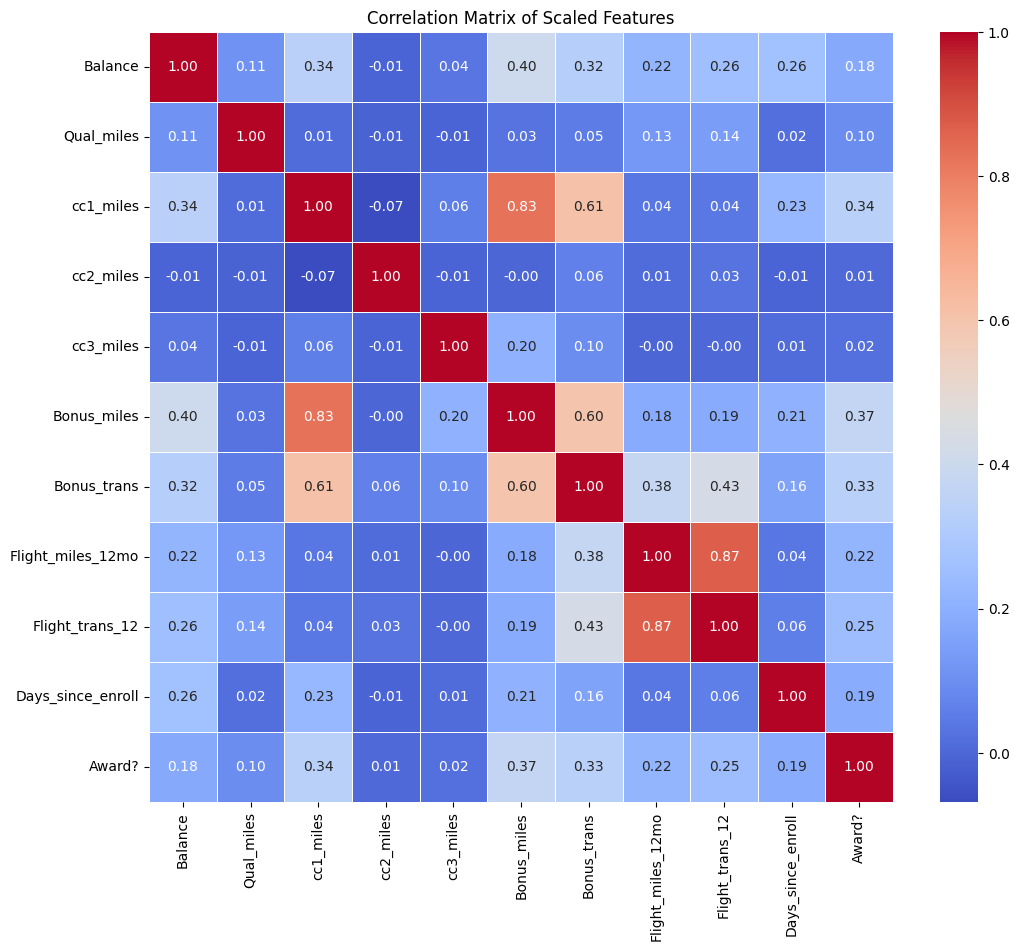

In [107]:
# Correlation Matrix
print("\nGenerating correlation heatmap...")
plt.figure(figsize=(12, 10))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Scaled Features')
plt.show()


Generating pairplot for a subset of features...


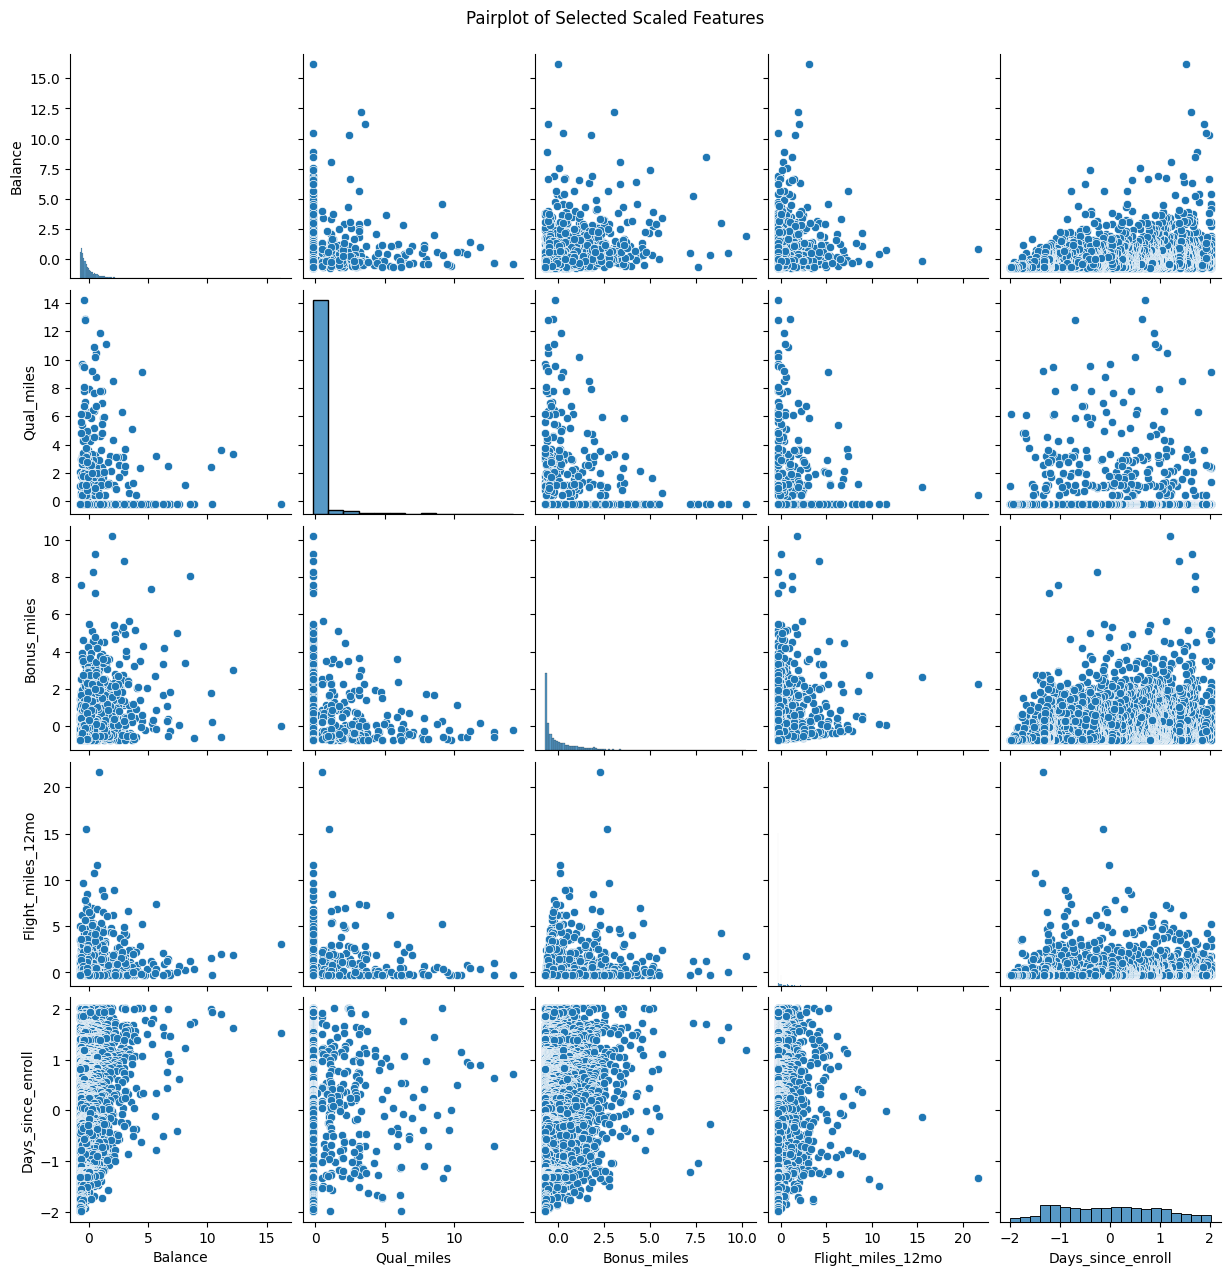

In [108]:
# Pairplot (for a subset of features due to high dimensionality)
# Selecting a few features for pairplot for better visualization
print("\nGenerating pairplot for a subset of features...")
# Let's pick some features that might show interesting relationships, or the first few
selected_cols = ['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']
sns.pairplot(scaled_df[selected_cols])
plt.suptitle('Pairplot of Selected Scaled Features', y=1.02)
plt.show()

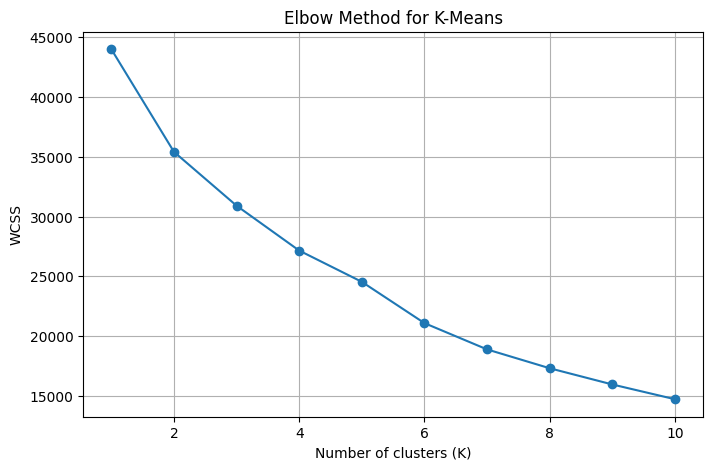

In [109]:
### Implementing K-means
from sklearn.cluster import KMeans

# Determine optimal K using the Elbow Method
wcss = []
max_k = 10 # Let's test up to 10 clusters
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init for robust initialization
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [110]:
wcss

[43989.0000000001,
 35409.516629861384,
 30906.11088389954,
 27154.3311689508,
 24541.471294111274,
 21089.69478480693,
 18891.926703111298,
 17316.77487702993,
 15961.476009310636,
 14728.292655169033]

In [111]:
# Let's choose K=4 for demonstration based on a typical elbow observation for such plots.
optimal_k = 4 # Example choice

In [112]:
print(f"\nApplying K-Means with K = {optimal_k}...")
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(scaled_df)
df['KMeans_Cluster'] = kmeans_labels


Applying K-Means with K = 4...


In [113]:
kmeans_labels

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [114]:
# Calculate Silhouette Score for K-Means
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

K-Means Silhouette Score: 0.3092



--- Hierarchical Clustering ---


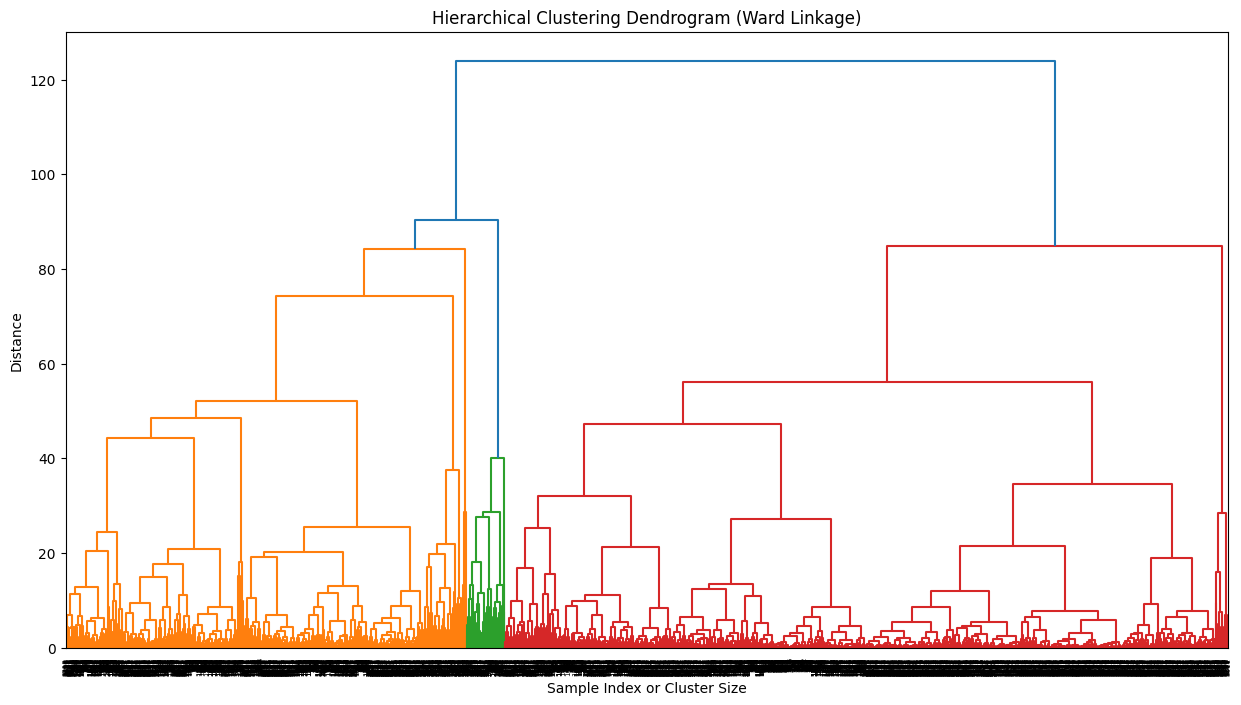

In [115]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
print("\n--- Hierarchical Clustering ---")
# Generate dendrogram to help determine number of clusters and linkage
plt.figure(figsize=(15, 8))
# Using 'ward' linkage as it's common for general purpose clustering and minimizes variance within clusters.
linked = linkage(scaled_df, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [116]:
print("Please observe the dendrogram above to choose the number of clusters. Look for long vertical lines where horizontal lines can cut through.")
# Based on the dendrogram, let's cut at a height that suggests 2, 3 or 4 clusters. Let's try 3 clusters for demonstration.
n_clusters_hierarchical = 3

Please observe the dendrogram above to choose the number of clusters. Look for long vertical lines where horizontal lines can cut through.


In [117]:
from sklearn.cluster import AgglomerativeClustering
print(f"\nApplying Hierarchical Clustering with {n_clusters_hierarchical} clusters (Ward linkage)...")
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward')
hierarchical_labels = hierarchical_model.fit_predict(scaled_df)
df['Hierarchical_Cluster'] = hierarchical_labels


Applying Hierarchical Clustering with 3 clusters (Ward linkage)...


In [118]:
hierarchical_silhouette = silhouette_score(scaled_df, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")

Hierarchical Clustering Silhouette Score: 0.2940


In [119]:
# DBSCAN
print("\n--- DBSCAN Clustering ---")
from sklearn.cluster import DBSCAN
# DBSCAN requires careful tuning of epsilon (eps) and minPts
# A common approach for choosing eps is to plot the k-distance graph.
# For minPts, a typical value is 2 * dimensionality of the data, or 4 for 2D, but can be higher.
# Given high dimensionality, let's start with some educated guesses and common values.
# Let's try a few combinations of eps and minPts.


--- DBSCAN Clustering ---


In [120]:
# Small function to run DBSCAN and report silhouette
def run_dbscan(X, eps, min_samples):
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan_model.fit_predict(X)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    if n_clusters > 1: # Silhouette score requires at least 2 clusters
        silhouette = silhouette_score(X, dbscan_labels)
        print(f"  DBSCAN (eps={eps}, minPts={min_samples}): Clusters={n_clusters}, Noise Points={n_noise}, Silhouette Score={silhouette:.4f}")
    else:
        print(f"  DBSCAN (eps={eps}, minPts={min_samples}): Clusters={n_clusters}, Noise Points={n_noise}, Silhouette Score=N/A (too few clusters)")
    return dbscan_labels

In [121]:
# These values will likely need fine-tuning based on the specific dataset characteristics.
# The `scaled_df` has 11 features, so a `min_samples` of 2*11 = 22 or higher might be a good starting point.
# `eps` can be found by plotting the k-distance graph (distance to the k-th nearest neighbor).
# For now, let's try some arbitrary values for demonstration.

In [122]:
# Try different eps values
eps_values = [0.5, 1.0, 1.5, 2.0]
# Try different min_samples values
min_samples_values = [5, 10, 15, 20]

best_dbscan_silhouette = -1
best_dbscan_params = (None, None)
best_dbscan_labels = None

In [123]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_labels = run_dbscan(scaled_df, eps, min_samples)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        if n_clusters > 1:
            current_silhouette = silhouette_score(scaled_df, dbscan_labels)
            if current_silhouette > best_dbscan_silhouette:
                best_dbscan_silhouette = current_silhouette
                best_dbscan_params = (eps, min_samples)
                best_dbscan_labels = dbscan_labels

  DBSCAN (eps=0.5, minPts=5): Clusters=16, Noise Points=1413, Silhouette Score=-0.0783
  DBSCAN (eps=0.5, minPts=10): Clusters=9, Noise Points=1722, Silhouette Score=-0.0984
  DBSCAN (eps=0.5, minPts=15): Clusters=10, Noise Points=1918, Silhouette Score=-0.1647
  DBSCAN (eps=0.5, minPts=20): Clusters=5, Noise Points=2135, Silhouette Score=-0.1133
  DBSCAN (eps=1.0, minPts=5): Clusters=6, Noise Points=554, Silhouette Score=0.1985
  DBSCAN (eps=1.0, minPts=10): Clusters=3, Noise Points=675, Silhouette Score=0.2185
  DBSCAN (eps=1.0, minPts=15): Clusters=2, Noise Points=734, Silhouette Score=0.2146
  DBSCAN (eps=1.0, minPts=20): Clusters=2, Noise Points=775, Silhouette Score=0.2124
  DBSCAN (eps=1.5, minPts=5): Clusters=5, Noise Points=310, Silhouette Score=0.2537
  DBSCAN (eps=1.5, minPts=10): Clusters=3, Noise Points=377, Silhouette Score=0.2462
  DBSCAN (eps=1.5, minPts=15): Clusters=2, Noise Points=431, Silhouette Score=0.2413
  DBSCAN (eps=1.5, minPts=20): Clusters=2, Noise Points=45

In [124]:
if best_dbscan_labels is not None:
    print(f"\nBest DBSCAN parameters found: eps={best_dbscan_params[0]}, minPts={best_dbscan_params[1]}")
    print(f"Best DBSCAN Silhouette Score: {best_dbscan_silhouette:.4f}")
    df['DBSCAN_Cluster'] = best_dbscan_labels
else:
    print("\nCould not find a DBSCAN configuration with more than one cluster and a valid silhouette score.")
    df['DBSCAN_Cluster'] = -2 # Indicate no meaningful clusters found



Best DBSCAN parameters found: eps=2.0, minPts=10
Best DBSCAN Silhouette Score: 0.2555


In [125]:
#  Cluster Analysis and Interpretation ---

# K-Means Cluster Analysis
print("\n--- K-Means Cluster Characteristics (K=4) ---")
kmeans_cluster_means = df.groupby('KMeans_Cluster')[df.columns].mean()
print(kmeans_cluster_means)
print("\nInsights for K-Means Clusters:")


--- K-Means Cluster Characteristics (K=4) ---
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               138061.400000   78.800000   3.466667   1.000000   4.066667   
1                43793.917814   97.436886   1.221785   1.019269   1.000393   
2               116817.336214  154.756481   3.701493   1.002357   1.001571   
3               191573.726190  775.863095   2.172619   1.035714   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               93927.866667    28.066667         506.666667         1.600000   
1                4700.690916     6.918993         198.621707         0.618168   
2               39216.199529    18.759623         334.355852         0.997643   
3               31412.160714    26.779762        5365.672619        15.636905  

In [126]:
# Iterate through each cluster and print insights based on mean values
for i in range(optimal_k):
    print(f"\nCluster {i} (K-Means):")
    cluster_data = kmeans_cluster_means.loc[i]
    print(f"  Average Balance: {cluster_data['Balance']:.2f}")
    print(f"  Average Qual_miles: {cluster_data['Qual_miles']:.2f}")
    print(f"  Average Bonus_miles: {cluster_data['Bonus_miles']:.2f}")
    print(f"  Average Flight_miles_12mo: {cluster_data['Flight_miles_12mo']:.2f}")
    print(f"  Average Days_since_enroll: {cluster_data['Days_since_enroll']:.2f}")
    # Add more interpretations based on feature importance
    if cluster_data['Balance'] > df['Balance'].mean() and \
       cluster_data['Bonus_miles'] > df['Bonus_miles'].mean():
        print("  - This cluster likely represents 'High-Value Customers' with large balances and bonus miles.")
    elif cluster_data['Qual_miles'] > df['Qual_miles'].mean():
        print("  - This cluster might represent 'Frequent Fliers' due to higher qualified miles.")
    elif cluster_data['Flight_miles_12mo'] > df['Flight_miles_12mo'].mean():
        print("  - This cluster could be 'Active Fliers' who have flown a lot recently.")
    else:
        print("  - This cluster represents 'Average/New Customers' with moderate engagement.")



Cluster 0 (K-Means):
  Average Balance: 138061.40
  Average Qual_miles: 78.80
  Average Bonus_miles: 93927.87
  Average Flight_miles_12mo: 506.67
  Average Days_since_enroll: 4613.87
  - This cluster likely represents 'High-Value Customers' with large balances and bonus miles.

Cluster 1 (K-Means):
  Average Balance: 43793.92
  Average Qual_miles: 97.44
  Average Bonus_miles: 4700.69
  Average Flight_miles_12mo: 198.62
  Average Days_since_enroll: 3691.56
  - This cluster represents 'Average/New Customers' with moderate engagement.

Cluster 2 (K-Means):
  Average Balance: 116817.34
  Average Qual_miles: 154.76
  Average Bonus_miles: 39216.20
  Average Flight_miles_12mo: 334.36
  Average Days_since_enroll: 4893.49
  - This cluster likely represents 'High-Value Customers' with large balances and bonus miles.

Cluster 3 (K-Means):
  Average Balance: 191573.73
  Average Qual_miles: 775.86
  Average Bonus_miles: 31412.16
  Average Flight_miles_12mo: 5365.67
  Average Days_since_enroll: 466

In [127]:
# Hierarchical Cluster Analysis
print("\n--- Hierarchical Cluster Characteristics (N_clusters=3) ---")
hierarchical_cluster_means = df.groupby('Hierarchical_Cluster')[df.columns].mean()
print(hierarchical_cluster_means)
print("\nInsights for Hierarchical Clusters:")
for i in range(n_clusters_hierarchical):
    print(f"\nCluster {i} (Hierarchical):")
    cluster_data = hierarchical_cluster_means.loc[i]
    print(f"  Average Balance: {cluster_data['Balance']:.2f}")
    print(f"  Average Qual_miles: {cluster_data['Qual_miles']:.2f}")
    print(f"  Average Bonus_miles: {cluster_data['Bonus_miles']:.2f}")
    print(f"  Average Flight_miles_12mo: {cluster_data['Flight_miles_12mo']:.2f}")
    print(f"  Average Days_since_enroll: {cluster_data['Days_since_enroll']:.2f}")
    if cluster_data['Balance'] > df['Balance'].mean() and \
       cluster_data['Bonus_miles'] > df['Bonus_miles'].mean():
        print("  - Similar to K-Means, this cluster shows characteristics of 'High-Value Customers'.")
    elif cluster_data['Flight_miles_12mo'] < df['Flight_miles_12mo'].mean() and \
         cluster_data['Qual_miles'] < df['Qual_miles'].mean():
        print("  - This cluster might represent 'Less Active Customers' or new enrollees with lower flight activity.")



--- Hierarchical Cluster Characteristics (N_clusters=3) ---
                            Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                    
0                      46718.863399    9.274407   1.242266   1.023303   
1                     116314.450725  363.839130   3.498551   1.000000   
2                     134880.892308  393.323077   2.430769   1.000000   

                      cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                            
0                      1.000000   5037.792688     7.091201         221.167135   
1                      1.035507  37150.356522    18.066667         377.000000   
2                      1.000000  36582.169231    29.338462        5915.523077   

                      Flight_trans_12  Days_since_enroll    Award?  \
Hierarchical_Cluster                                                 
0                          

In [128]:
# DBSCAN Cluster Analysis (if meaningful clusters were found)
if best_dbscan_labels is not None and len(set(best_dbscan_labels)) > 1:
    print("\n--- DBSCAN Cluster Characteristics ---")
    dbscan_cluster_means = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[df.columns].mean()
    print(dbscan_cluster_means)
    print("\nInsights for DBSCAN Clusters:")
    for i in sorted(set(best_dbscan_labels) - {-1}):
        print(f"\nCluster {i} (DBSCAN):")
        cluster_data = dbscan_cluster_means.loc[i]
        print(f"  Average Balance: {cluster_data['Balance']:.2f}")
        print(f"  Average Qual_miles: {cluster_data['Qual_miles']:.2f}")
        print(f"  Average Bonus_miles: {cluster_data['Bonus_miles']:.2f}")
        # DBSCAN often finds density-based clusters, and some clusters might be small or specific.
        if cluster_data['Flight_miles_12mo'] > df['Flight_miles_12mo'].mean() and \
           cluster_data['Balance'] > df['Balance'].mean():
            print("  - This DBSCAN cluster identifies a dense group of 'Moderately Active, High-Balance Customers'.")
        else:
            print("  - This DBSCAN cluster represents a specific dense group within the data, often highlighting unique customer segments based on density.")
    print(f"\nNumber of Noise points (DBSCAN, label -1): {list(best_dbscan_labels).count(-1)}")
    print("Noise points are observations that do not belong to any cluster.")
else:
    print("\nDBSCAN did not find meaningful clusters with the tested parameters for detailed analysis.")


--- DBSCAN Cluster Characteristics ---
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                              
0               57638.687142   42.589271   1.696151        1.0        1.0   
1               75894.286043   91.086656   2.638804        1.0        1.0   
2               39218.500000    0.000000   1.000000        2.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Cluster                                                                  
0                9779.582719      8.90131         188.470925         0.549550   
1               25364.305215     14.11273         450.680982         1.416411   
2                9189.250000     13.50000         209.375000         0.812500   

                Days_since_enroll  Award?  KMeans_Cluster  \
DBSCAN_Cluster                                              
0                     3813.633907     0.0     

In [129]:
# Visualization ---

In [130]:
# For visualization, we need to reduce dimensionality as the dataset has 11 features.
# PCA is a good choice for this.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [131]:
# Add cluster labels to the PCA DataFrame
pca_df['KMeans_Cluster'] = df['KMeans_Cluster']
pca_df['Hierarchical_Cluster'] = df['Hierarchical_Cluster']
pca_df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'] # Will be -2 if no clusters were found


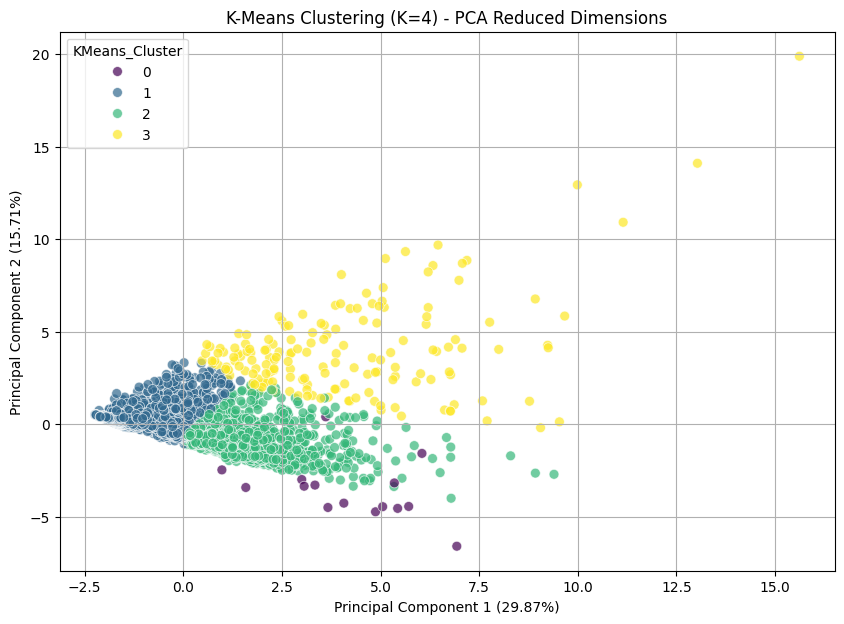

In [132]:
# K-Means Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis', legend='full', s=50, alpha=0.7)
plt.title(f'K-Means Clustering (K={optimal_k}) - PCA Reduced Dimensions')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.show()

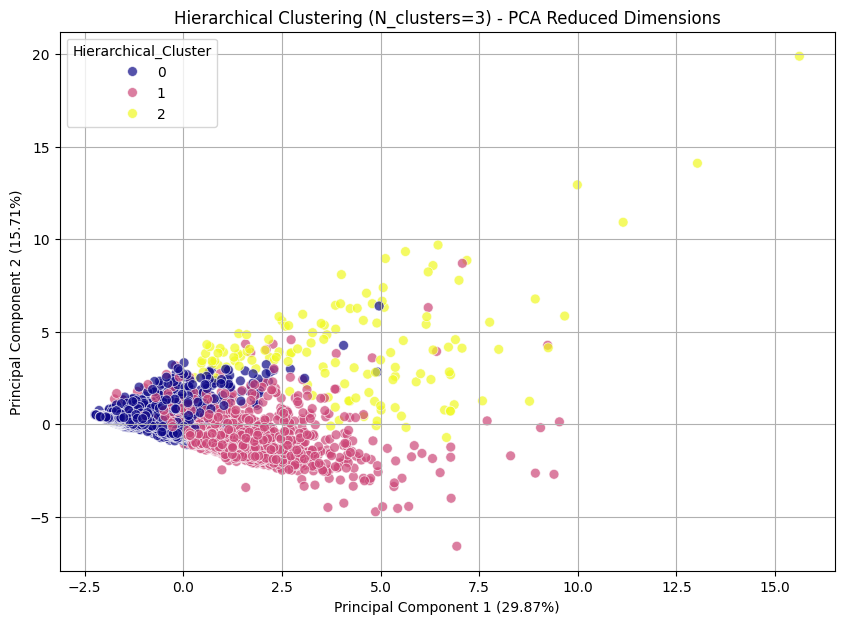

In [133]:
# Hierarchical Clustering Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=pca_df, palette='plasma', legend='full', s=50, alpha=0.7)
plt.title(f'Hierarchical Clustering (N_clusters={n_clusters_hierarchical}) - PCA Reduced Dimensions')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.show()


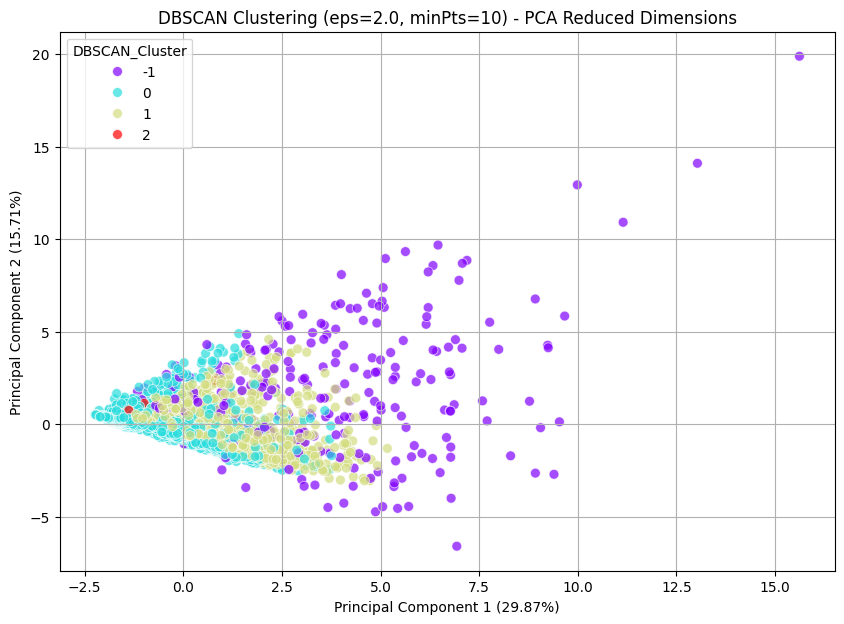

In [134]:
# DBSCAN Visualization (if meaningful clusters exist)
if best_dbscan_labels is not None and len(set(best_dbscan_labels)) > 1:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='rainbow', legend='full', s=50, alpha=0.7)
    plt.title(f'DBSCAN Clustering (eps={best_dbscan_params[0]}, minPts={best_dbscan_params[1]}) - PCA Reduced Dimensions')
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    plt.grid(True)
    plt.show()
else:
    print("\nSkipping DBSCAN visualization as no meaningful clusters were found.")


In [135]:
#Evaluation and Performance Metrics ---

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")
if best_dbscan_labels is not None and len(set(best_dbscan_labels)) > 1:
    print(f"DBSCAN Silhouette Score: {best_dbscan_silhouette:.4f}")
else:
    print("DBSCAN Silhouette Score: N/A (no meaningful clusters found)")

print("\n--- Summary of Clustering Results ---")
print("\nK-Means:")
print(f"  - Chosen K: {optimal_k}")
print(f"  - Silhouette Score: {kmeans_silhouette:.4f}")
print("  - K-Means produced distinct clusters, generally good for identifying spherical, equally-sized groups. The elbow method helped determine K.")
print("  - The clusters show varying levels of customer engagement, loyalty, and flight activity.")

print("\nHierarchical Clustering:")
print(f"  - Chosen number of clusters: {n_clusters_hierarchical}")
print(f"  - Silhouette Score: {hierarchical_silhouette:.4f}")
print("  - Hierarchical clustering, especially with Ward linkage, can capture more complex cluster shapes and provides a dendrogram for visual cluster merging. It offers flexibility in choosing the number of clusters by cutting the dendrogram.")
print("  - The clusters tend to group customers based on their overall activity and balance levels.")

print("\nDBSCAN:")
if best_dbscan_labels is not None and len(set(best_dbscan_labels)) > 1:
    print(f"  - Best parameters: eps={best_dbscan_params[0]}, minPts={best_dbscan_params[1]}")
    print(f"  - Silhouette Score: {best_dbscan_silhouette:.4f}")
    print("  - DBSCAN is effective at finding arbitrarily shaped clusters and identifying noise points (outliers). It doesn't require pre-defining the number of clusters.")
    print(f"  - It found {len(set(best_dbscan_labels)) - (1 if -1 in best_dbscan_labels else 0)} clusters and identified {list(best_dbscan_labels).count(-1)} noise points.")
    print("  - The clusters found by DBSCAN are typically dense regions in the feature space.")
else:
    print("  - DBSCAN did not find meaningful clusters with the tested parameters. This often indicates that the default parameters or the explored range might not be suitable for the dataset's density, or the data may not have clear density-based clusters.")

print("\n--- Overall Conclusion ---")
print("Each clustering algorithm offers a different perspective on the data. K-Means is good for general segmentation, Hierarchical provides a hierarchy of clusters, and DBSCAN excels at finding dense regions and identifying outliers.")
print("The choice of the 'best' algorithm depends on the specific business objective and the underlying structure of the data.")

K-Means Silhouette Score: 0.3092
Hierarchical Clustering Silhouette Score: 0.2940
DBSCAN Silhouette Score: 0.2555

--- Summary of Clustering Results ---

K-Means:
  - Chosen K: 4
  - Silhouette Score: 0.3092
  - K-Means produced distinct clusters, generally good for identifying spherical, equally-sized groups. The elbow method helped determine K.
  - The clusters show varying levels of customer engagement, loyalty, and flight activity.

Hierarchical Clustering:
  - Chosen number of clusters: 3
  - Silhouette Score: 0.2940
  - Hierarchical clustering, especially with Ward linkage, can capture more complex cluster shapes and provides a dendrogram for visual cluster merging. It offers flexibility in choosing the number of clusters by cutting the dendrogram.
  - The clusters tend to group customers based on their overall activity and balance levels.

DBSCAN:
  - Best parameters: eps=2.0, minPts=10
  - Silhouette Score: 0.2555
  - DBSCAN is effective at finding arbitrarily shaped clusters a

In [136]:
## Done